# Data Modeling & Visualizations

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
from pprint import pprint
from datetime import datetime
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('max_columns', 150)

# Import Data

**Import 2015-2016 Data**

In [3]:
# Import Game Log Data
df1 = pd.read_pickle('clean_player_game_log_15to16')
# Preview Data
df1.head(n=3)

,PLAYER_NAME,TEAM_NAME,POS,DAYS_SINCE_LAST_GAME,HOME,FANDUEL_PTS,LAST_TEN,AVG_MIN_LAST_1,AVG_FANDUEL_PTS_LAST_1,AVG_PTS_LAST_1,AVG_FGM_LAST_1,AVG_FGA_LAST_1,AVG_FG3M_LAST_1,AVG_FG3A_LAST_1,AVG_FTM_LAST_1,AVG_FTA_LAST_1,AVG_OREB_LAST_1,AVG_DREB_LAST_1,AVG_AST_LAST_1,AVG_STL_LAST_1,AVG_BLK_LAST_1,AVG_TOV_LAST_1,AVG_PF_LAST_1,AVG_MIN_LAST_3,AVG_FANDUEL_PTS_LAST_3,AVG_PTS_LAST_3,AVG_FGM_LAST_3,AVG_FGA_LAST_3,AVG_FG3M_LAST_3,AVG_FG3A_LAST_3,AVG_FTM_LAST_3,AVG_FTA_LAST_3,AVG_OREB_LAST_3,AVG_DREB_LAST_3,AVG_AST_LAST_3,AVG_STL_LAST_3,AVG_BLK_LAST_3,AVG_TOV_LAST_3,AVG_PF_LAST_3,AVG_MIN_LAST_5,AVG_FANDUEL_PTS_LAST_5,AVG_PTS_LAST_5,AVG_FGM_LAST_5,AVG_FGA_LAST_5,AVG_FG3M_LAST_5,AVG_FG3A_LAST_5,AVG_FTM_LAST_5,AVG_FTA_LAST_5,AVG_OREB_LAST_5,AVG_DREB_LAST_5,AVG_AST_LAST_5,AVG_STL_LAST_5,AVG_BLK_LAST_5,AVG_TOV_LAST_5,AVG_PF_LAST_5,AVG_MIN_LAST_10,AVG_FANDUEL_PTS_LAST_10,AVG_PTS_LAST_10,AVG_FGM_LAST_10,AVG_FGA_LAST_10,AVG_FG3M_LAST_10,AVG_FG3A_LAST_10,AVG_FTM_LAST_10,AVG_FTA_LAST_10,AVG_OREB_LAST_10,AVG_DREB_LAST_10,AVG_AST_LAST_10,AVG_STL_LAST_10,AVG_BLK_LAST_10,AVG_TOV_LAST_10,AVG_PF_LAST_10,OPPONENT,W_PCT,OPP_FG_PCT,OPP_FG3_PCT,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,POS_C,POS_PF,POS_PG,POS_SF,POS_SG,POS_UNKNOWN,OPP_Atlanta Hawks,OPP_Boston Celtics,OPP_Brooklyn Nets,OPP_Charlotte Hornets,OPP_Chicago Bulls,OPP_Cleveland Cavaliers,OPP_Dallas Mavericks,OPP_Denver Nuggets,OPP_Detroit Pistons,OPP_Golden State Warriors,OPP_Houston Rockets,OPP_Indiana Pacers,OPP_Los Angeles Clippers,OPP_Los Angeles Lakers,OPP_Memphis Grizzlies,OPP_Miami Heat,OPP_Milwaukee Bucks,OPP_Minnesota Timberwolves,OPP_New Orleans Pelicans,OPP_New York Knicks,OPP_Oklahoma City Thunder,OPP_Orlando Magic,OPP_Philadelphia 76ers,OPP_Phoenix Suns,OPP_Portland Trail Blazers,OPP_Sacramento Kings,OPP_San Antonio Spurs,OPP_Toronto Raptors,OPP_Utah Jazz,OPP_Washington Wizards
0,Aaron Brooks,Chicago Bulls,PG,NaN,1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland Cavaliers,0.695,0.448,0.347,0.743,9.3,31.8,21.4,13.3,7.2,4.4,3.9,20.6,20.3,98.3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,Aaron Brooks,Chicago Bulls,PG,1.0,0,18.7,1.0,16.0,6.4,6.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,16.0,6.40,6.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,16.0,6.40,6.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,16.0,6.40,6.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,Brooklyn Nets,0.256,0.479,0.369,0.763,10.2,33.2,24.5,14.2,8.8,5.2,4.0,18.4,18.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1764,Aaron Brooks,Chicago Bulls,PG,2.0,0,15.8,1.0,16.0,18.7,12.0,5.0,9.0,2.0,6.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,4.0,16.0,12.55,9.0,4.0,9.0,1.0,3.5,0.0,0.0,0.0,1.5,1.5,0.5,0.0,1.5,2.5,16.0,12.55,9.0,4.0,9.0,1.0,3.5,0.0,0.0,0.0,1.5,1.5,0.5,0.0,1.5,2.5,16.0,12.55,9.0,4.0,9.0,1.0,3.5,0.0,0.0,0.0,1.5,1.5,0.5,0.0,1.5,2.5,Detroit Pistons,0.537,0.461,0.355,0.783,8.8,33.7,21.5,13.4,7.1,4.5,3.7,21.6,19.0,101.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Import 2014-2015 Data**

In [4]:
# Import Game Log Data
df2 = pd.read_pickle('clean_player_game_log_14to15')
# Preview Data
df2.head(n=3)

,PLAYER_NAME,TEAM_NAME,POS,DAYS_SINCE_LAST_GAME,HOME,FANDUEL_PTS,LAST_TEN,AVG_MIN_LAST_1,AVG_FANDUEL_PTS_LAST_1,AVG_PTS_LAST_1,AVG_FGM_LAST_1,AVG_FGA_LAST_1,AVG_FG3M_LAST_1,AVG_FG3A_LAST_1,AVG_FTM_LAST_1,AVG_FTA_LAST_1,AVG_OREB_LAST_1,AVG_DREB_LAST_1,AVG_AST_LAST_1,AVG_STL_LAST_1,AVG_BLK_LAST_1,AVG_TOV_LAST_1,AVG_PF_LAST_1,AVG_MIN_LAST_3,AVG_FANDUEL_PTS_LAST_3,AVG_PTS_LAST_3,AVG_FGM_LAST_3,AVG_FGA_LAST_3,AVG_FG3M_LAST_3,AVG_FG3A_LAST_3,AVG_FTM_LAST_3,AVG_FTA_LAST_3,AVG_OREB_LAST_3,AVG_DREB_LAST_3,AVG_AST_LAST_3,AVG_STL_LAST_3,AVG_BLK_LAST_3,AVG_TOV_LAST_3,AVG_PF_LAST_3,AVG_MIN_LAST_5,AVG_FANDUEL_PTS_LAST_5,AVG_PTS_LAST_5,AVG_FGM_LAST_5,AVG_FGA_LAST_5,AVG_FG3M_LAST_5,AVG_FG3A_LAST_5,AVG_FTM_LAST_5,AVG_FTA_LAST_5,AVG_OREB_LAST_5,AVG_DREB_LAST_5,AVG_AST_LAST_5,AVG_STL_LAST_5,AVG_BLK_LAST_5,AVG_TOV_LAST_5,AVG_PF_LAST_5,AVG_MIN_LAST_10,AVG_FANDUEL_PTS_LAST_10,AVG_PTS_LAST_10,AVG_FGM_LAST_10,AVG_FGA_LAST_10,AVG_FG3M_LAST_10,AVG_FG3A_LAST_10,AVG_FTM_LAST_10,AVG_FTA_LAST_10,AVG_OREB_LAST_10,AVG_DREB_LAST_10,AVG_AST_LAST_10,AVG_STL_LAST_10,AVG_BLK_LAST_10,AVG_TOV_LAST_10,AVG_PF_LAST_10,OPPONENT,W_PCT,OPP_FG_PCT,OPP_FG3_PCT,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,POS_C,POS_PF,POS_PG,POS_SF,POS_SG,POS_UNKNOWN,OPP_Atlanta Hawks,OPP_Boston Celtics,OPP_Brooklyn Nets,OPP_Charlotte Hornets,OPP_Chicago Bulls,OPP_Cleveland Cavaliers,OPP_Dallas Mavericks,OPP_Denver Nuggets,OPP_Detroit Pistons,OPP_Golden State Warriors,OPP_Houston Rockets,OPP_Indiana Pacers,OPP_Los Angeles Clippers,OPP_Los Angeles Lakers,OPP_Memphis Grizzlies,OPP_Miami Heat,OPP_Milwaukee Bucks,OPP_Minnesota Timberwolves,OPP_New Orleans Pelicans,OPP_New York Knicks,OPP_Oklahoma City Thunder,OPP_Orlando Magic,OPP_Philadelphia 76ers,OPP_Phoenix Suns,OPP_Portland Trail Blazers,OPP_Sacramento Kings,OPP_San Antonio Spurs,OPP_Toronto Raptors,OPP_Utah Jazz,OPP_Washington Wizards
0,A.J. Price,Indiana Pacers,PG,NaN,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boston Celtics,0.488,0.450,0.336,0.755,10.9,33.8,21.9,15.1,7.1,5.3,3.6,18.8,21.2,101.2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
836,A.J. Price,Indiana Pacers,PG,1.0,1,15.4,0.0,14.0,10.0,5.0,2.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,14.0,10.0,5.0,2.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,14.0,10.0,5.0,2.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,14.0,10.0,5.0,2.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,Washington Wizards,0.561,0.433,0.349,0.738,10.0,31.7,19.9,14.0,8.0,4.3,4.6,19.6,20.8,97.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1709,A.J. Price,Indiana Pacers,PG,2.0,1,22.7,0.0,17.0,15.4,9.0,4.0,8.0,0.0,1.0,1.0,2.0,0.0,2.0,4.0,0.0,0.0,2.0,1.0,15.5,12.7,7.0,3.0,7.5,0.5,2.0,0.5,1.0,0.0,1.0,4.0,0.0,0.0,1.5,1.0,15.5,12.7,7.0,3.0,7.5,0.5,2.0,0.5,1.0,0.0,1.0,4.0,0.0,0.0,1.5,1.0,15.5,12.7,7.0,3.0,7.5,0.5,2.0,0.5,1.0,0.0,1.0,4.0,0.0,0.0,1.5,1.0,Utah Jazz,0.463,0.446,0.362,0.744,9.9,29.3,19.4,13.1,8.2,4.7,6.0,19.6,19.3,94.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Preprocessing

**Merge Dataframes from Different Years**

In [5]:
def merge_dataframes(df1,df2):
    df = df1.append(df2)
    return df

In [6]:
df = merge_dataframes(df1,df2)

In [7]:
df.columns[:50]

Index(['PLAYER_NAME', 'TEAM_NAME', 'POS', 'DAYS_SINCE_LAST_GAME', 'HOME',
       'FANDUEL_PTS', 'LAST_TEN', 'AVG_MIN_LAST_1', 'AVG_FANDUEL_PTS_LAST_1',
       'AVG_PTS_LAST_1', 'AVG_FGM_LAST_1', 'AVG_FGA_LAST_1', 'AVG_FG3M_LAST_1',
       'AVG_FG3A_LAST_1', 'AVG_FTM_LAST_1', 'AVG_FTA_LAST_1',
       'AVG_OREB_LAST_1', 'AVG_DREB_LAST_1', 'AVG_AST_LAST_1',
       'AVG_STL_LAST_1', 'AVG_BLK_LAST_1', 'AVG_TOV_LAST_1', 'AVG_PF_LAST_1',
       'AVG_MIN_LAST_3', 'AVG_FANDUEL_PTS_LAST_3', 'AVG_PTS_LAST_3',
       'AVG_FGM_LAST_3', 'AVG_FGA_LAST_3', 'AVG_FG3M_LAST_3',
       'AVG_FG3A_LAST_3', 'AVG_FTM_LAST_3', 'AVG_FTA_LAST_3',
       'AVG_OREB_LAST_3', 'AVG_DREB_LAST_3', 'AVG_AST_LAST_3',
       'AVG_STL_LAST_3', 'AVG_BLK_LAST_3', 'AVG_TOV_LAST_3', 'AVG_PF_LAST_3',
       'AVG_MIN_LAST_5', 'AVG_FANDUEL_PTS_LAST_5', 'AVG_PTS_LAST_5',
       'AVG_FGM_LAST_5', 'AVG_FGA_LAST_5', 'AVG_FG3M_LAST_5',
       'AVG_FG3A_LAST_5', 'AVG_FTM_LAST_5', 'AVG_FTA_LAST_5',
       'AVG_OREB_LAST_5', 'AVG_DREB_LA

In [8]:
df.columns[50:100]

Index(['AVG_AST_LAST_5', 'AVG_STL_LAST_5', 'AVG_BLK_LAST_5', 'AVG_TOV_LAST_5',
       'AVG_PF_LAST_5', 'AVG_MIN_LAST_10', 'AVG_FANDUEL_PTS_LAST_10',
       'AVG_PTS_LAST_10', 'AVG_FGM_LAST_10', 'AVG_FGA_LAST_10',
       'AVG_FG3M_LAST_10', 'AVG_FG3A_LAST_10', 'AVG_FTM_LAST_10',
       'AVG_FTA_LAST_10', 'AVG_OREB_LAST_10', 'AVG_DREB_LAST_10',
       'AVG_AST_LAST_10', 'AVG_STL_LAST_10', 'AVG_BLK_LAST_10',
       'AVG_TOV_LAST_10', 'AVG_PF_LAST_10', 'OPPONENT', 'W_PCT', 'OPP_FG_PCT',
       'OPP_FG3_PCT', 'OPP_FT_PCT', 'OPP_OREB', 'OPP_DREB', 'OPP_AST',
       'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_BLKA', 'OPP_PF', 'OPP_PFD',
       'OPP_PTS', 'POS_C', 'POS_PF', 'POS_PG', 'POS_SF', 'POS_SG',
       'POS_UNKNOWN', 'OPP_Atlanta Hawks', 'OPP_Boston Celtics',
       'OPP_Brooklyn Nets', 'OPP_Charlotte Hornets', 'OPP_Chicago Bulls',
       'OPP_Cleveland Cavaliers', 'OPP_Dallas Mavericks',
       'OPP_Denver Nuggets'],
      dtype='object')

In [9]:
df.columns[100:]

Index(['OPP_Detroit Pistons', 'OPP_Golden State Warriors',
       'OPP_Houston Rockets', 'OPP_Indiana Pacers', 'OPP_Los Angeles Clippers',
       'OPP_Los Angeles Lakers', 'OPP_Memphis Grizzlies', 'OPP_Miami Heat',
       'OPP_Milwaukee Bucks', 'OPP_Minnesota Timberwolves',
       'OPP_New Orleans Pelicans', 'OPP_New York Knicks',
       'OPP_Oklahoma City Thunder', 'OPP_Orlando Magic',
       'OPP_Philadelphia 76ers', 'OPP_Phoenix Suns',
       'OPP_Portland Trail Blazers', 'OPP_Sacramento Kings',
       'OPP_San Antonio Spurs', 'OPP_Toronto Raptors', 'OPP_Utah Jazz',
       'OPP_Washington Wizards'],
      dtype='object')

**Drop Columns with Null Values**

In [14]:
def drop_columns_with_na(df):
    df = df.copy()
    return df.dropna()
df = drop_columns_with_na(df)

**Set Target Label**

In [15]:
label = ['FANDUEL_PTS']
y = df[label]
y = y.values.ravel()

# Modeling

**Make Functions to Retrieve & Print Metrics**

In [49]:
def get_scores(model, X, y, X_train, X_test, y_train, y_test):
    '''
    Input: 
        model - fitted model
    '''
    # Cross Validation Score
    cv_score = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mse_cv = -np.mean(cv_score)
    
    # Out of Sample Metrics
    r_2_out = model.score(X_test, y_test)
    y_pred_out = model.predict(X_test)
    mse_out = metrics.mean_squared_error(y_test,y_pred_out)
    
    # In Sample Metrics
    r_2_in = model.score(X_train,y_train)
    y_pred_in = model.predict(X_train)
    mse_in = metrics.mean_squared_error(y_train,y_pred_in)
    
    return cv_score, mse_cv, r_2_out, y_pred_out, mse_out, r_2_in, y_pred_in, mse_in

In [50]:
def print_scores(model_type, model, cv_score, mse_cv, 
                 r_2_out, y_pred_out, mse_out, 
                 r_2_in, y_pred_in, mse_in, print_params,features):
    try:
        print('Alpha',model.alpha_)
    except:
        pass
    print('Cross Validated')
    print('Mean Squared Error:',mse_cv)
    print('-------------------------')
    print('Out of Sample')
    print('R^2 Score:',r_2_out)
    print('Mean Squared Error:',mse_out)
    print('Root Mean Squared Error:',mse_out**0.5)
    print('-------------------------')
    print('In Sample')
    print('R^2 Score:',r_2_in)
    print('Mean Squared Error:', mse_in)
    print('Root Mean Squared Error:',mse_in**0.5)
    if print_params == True:
        print('-------------------------')
        print('Parameters:')
        params = list(zip(features,model.coef_))
        for param in params:
            pprint(str(param[0]) + ': ' + str(param[1]))

**Make Function to Create Model Based on Input Model Type**

In [51]:
def create_model(model_type,X_train,y_train):
    if (model_type == 'linreg') or (model_type == 'poly'):
        model = LinearRegression()
        model.fit(X_train, y_train)
    elif model_type == 'lasso':
        model = LassoCV(cv=10)
        model.fit(X_train, y_train)
    elif model_type =='ridge':
        model = RidgeCV(cv=10)
        model.fit(X_train, y_train)
    return model

**Make Function to Plot Residuals**

In [94]:
def plot_residuals_scatter(y_true, y_pred):
    residuals = y_true - y_pred
    
    plt.figure(1)
    rc = {'figure.facecolor': 'black',
      'axes.facecolor': 'white',
      'grid.color': 'black',
      'text.color': 'white',
      'ytick.color': 'white',
      'xtick.color': 'white',
      'axes.labelcolor': 'white'}
    ax = sns.regplot(y_pred, y=residuals, scatter=True,color='#000080',
                     scatter_kws={'s':10,'facecolors': '#27408b',
                                  'edgecolors':'black','linewidths': 0.01})
    plt.rcParams['figure.figsize']=(12,8) 
    
    sns.plt.title('Residual Scatter Plot',fontsize=30)
    sns.plt.xlabel('Predicted Y', fontsize=24)
    sns.plt.ylabel('Residuals', fontsize=24)
    plt.tick_params(axis='both', labelsize=16)
    sns.set_style(style='whitegrid',rc=rc)

In [95]:
def plot_residuals_dist(y_true,y_pred):
    rc = {'figure.facecolor': 'black',
      'axes.facecolor': 'white',
      'grid.color': 'black',
      'text.color': 'white',
      'ytick.color': 'white',
      'xtick.color': 'white',
      'axes.labelcolor': 'white',
      'axes.linewidth': 0.1}
    
    residuals = y_true - y_pred
    plt.figure(2)
    ax = sns.distplot(residuals,bins=20,hist_kws={"linewidth": 2,'alpha':0.5,
                                                  'facecolor':'#8b1a1a','edgecolor':'black'},
                      kde_kws={'color':'black', 'linewidth':3})
    
    plt.rcParams['figure.figsize']=(12,8) 
    sns.plt.title('Residual Distribution Plot',fontsize=30)
    sns.plt.xlabel('Residual', fontsize=24)
    sns.plt.ylabel('Probability', fontsize=24)
    plt.tick_params(axis='both', labelsize=16)
    sns.set_style(style='whitegrid',rc=rc)

**Create Linear Regression Model**

In [88]:
def model(X, y, features, model_type, degree=0, plot_resid=False,
          standardize=True,print_params=False,randomstate=False):
    '''
    Input:
        X = Features
        y = Target 
        model_type = linreg, lasso, ridge, poly
        degree = polynomial degree (Only Valid if model_type is poly)
        standardize = Scale values to zero mean & unit variance
        print_params = Print Parameters/Coefficients
        randomstate = pseudo-random state for train test split
    '''
    # Preprocessing
    if model_type == 'poly':
        poly = PolynomialFeatures(degree=degree)
        X = poly.fit_transform(X)
    
    # Standardize
    if standardize:
        X = preprocessing.scale(X)
    
    # Split Samples    
    if randomstate:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Create Model
    model = create_model(model_type,X_train,y_train)
    
    # Predict Results/Metrics
    cv_score, mse_cv, r_2_out, y_pred_out, mse_out, r_2_in, y_pred_in, mse_in =\
    get_scores(model, X, y, X_train, X_test, y_train, y_test)
    
    # Print Results
    print_scores(model_type, model, cv_score, mse_cv, 
                 r_2_out, y_pred_out, mse_out, 
                 r_2_in, y_pred_in, mse_in, print_params,features)
    
    # Residual Plot
    if plot_resid:
        plot_residuals_scatter(y_true=y_test, y_pred=y_pred_out)
        plot_residuals_dist(y_true=y_test, y_pred=y_pred_out)
    return model

## Iteration 1 - Simple Features

In [97]:
def iteration_1_sklearn(df, y):
    features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='linreg',
                   randomstate=False, print_params=True,plot_resid=True)
    print('')
    print('')
    print('Linear Regression Model w/ Lasso')
    lasso = model(X, y, features, model_type='lasso',
                  randomstate=False, print_params=True)
    print('')
    print('')
    print('Linear Regression Model w/ Ridge')
    ridge = model(X, y, features, model_type='ridge'
                  ,randomstate=False,print_params=True)    

Linear Regression Model
Cross Validated
Mean Squared Error: 85.8445497424
-------------------------
Out of Sample
R^2 Score: 0.479511945786
Mean Squared Error: 85.0662416549
Root Mean Squared Error: 9.22313621578
-------------------------
In Sample
R^2 Score: 0.468375308148
Mean Squared Error: 86.1525993929
Root Mean Squared Error: 9.2818424568
-------------------------
Parameters:
'DAYS_SINCE_LAST_GAME: -0.343743535625'
'HOME: 0.257797718466'
'AVG_FANDUEL_PTS_LAST_3: 8.6651232515'


/Users/Masa/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j




Linear Regression Model w/ Lasso
Alpha 0.00877281293465
Cross Validated
Mean Squared Error: 85.8447860697
-------------------------
Out of Sample
R^2 Score: 0.471863299525
Mean Squared Error: 85.4762346933
Root Mean Squared Error: 9.24533583453
-------------------------
In Sample
R^2 Score: 0.471665027671
Mean Squared Error: 85.976596981
Root Mean Squared Error: 9.27235660342
-------------------------
Parameters:
'DAYS_SINCE_LAST_GAME: -0.359449917356'
'HOME: 0.267692933'
'AVG_FANDUEL_PTS_LAST_3: 8.66642639164'


Linear Regression Model w/ Ridge
Alpha 10.0
Cross Validated
Mean Squared Error: 85.8445764928
-------------------------
Out of Sample
R^2 Score: 0.469704391478
Mean Squared Error: 85.8233830489
Root Mean Squared Error: 9.26409105357
-------------------------
In Sample
R^2 Score: 0.472577781258
Mean Squared Error: 85.8302575783
Root Mean Squared Error: 9.26446207712
-------------------------
Parameters:
'DAYS_SINCE_LAST_GAME: -0.368992764402'
'HOME: 0.224327474663'
'AVG_FANDU

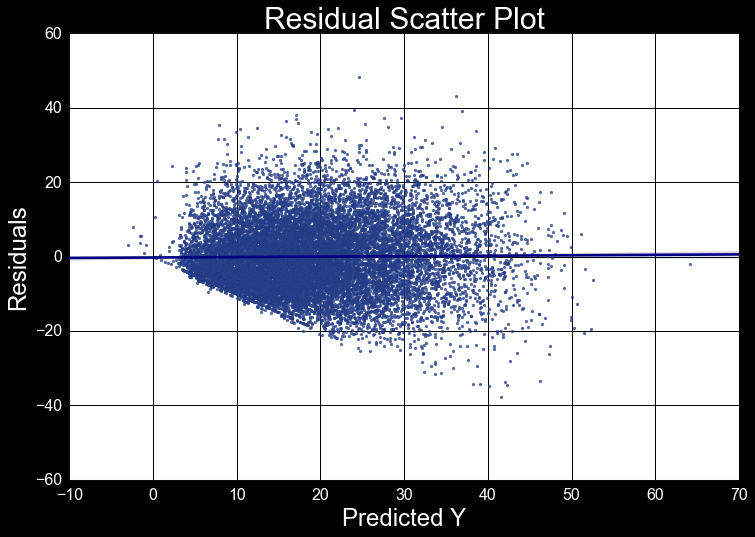

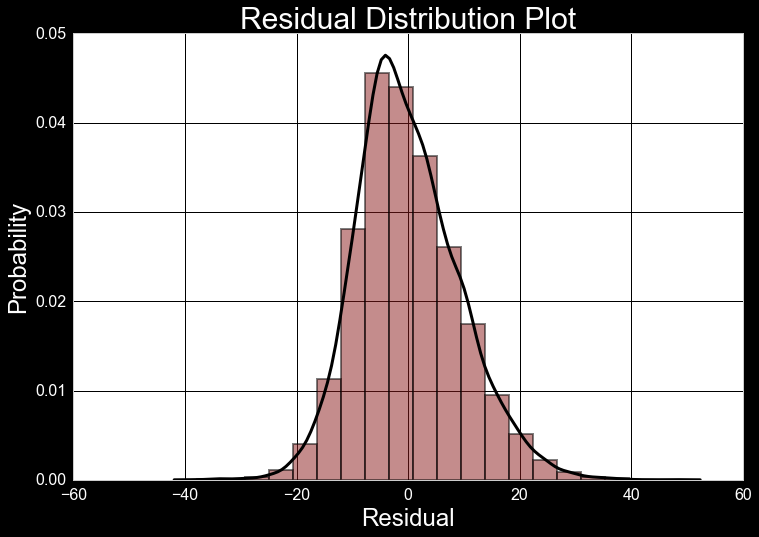

In [98]:
iter_1 = iteration_1_sklearn(df,y)

In [79]:
features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
stats_0 = stats_model(df,features,label)
stats_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FANDUEL_PTS   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Fri, 03 Feb 2017   Prob (F-statistic):               0.00
Time:                        03:14:36   Log-Likelihood:            -1.8623e+05
No. Observations:               51091   AIC:                         3.725e+05
Df Residuals:                   51087   BIC:                         3.725e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  3.9867      0.098     40.798      0.000         3.795     4.178
DAYS_SINCE_LAST_GAME      -0.0932      0.011     -8.837      0.000        -0.114    -0.073
HOME                       0.4777      0.082      5.822      0.000         0.317     0.638
AVG_FANDUEL_PTS_LAST_3     0.7935      0.004    210.146      0.000         0.786     0.801
==============================================================================
Omnibus:                     2147.697   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2636.163
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       3.611   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Iteration 2 - Try More Features

In [106]:
def iteration_2(df, y):
    features   = ['DAYS_SINCE_LAST_GAME', 'HOME',
                  'LAST_TEN', 'AVG_MIN_LAST_1', 'AVG_FANDUEL_PTS_LAST_1',
                  'AVG_PTS_LAST_1', 'AVG_FGM_LAST_1', 'AVG_FGA_LAST_1', 'AVG_FG3M_LAST_1',
                  'AVG_FG3A_LAST_1', 'AVG_FTM_LAST_1', 'AVG_FTA_LAST_1',
                  'AVG_OREB_LAST_1', 'AVG_DREB_LAST_1', 'AVG_AST_LAST_1',
                  'AVG_STL_LAST_1', 'AVG_BLK_LAST_1', 'AVG_TOV_LAST_1', 'AVG_PF_LAST_1',
                  'AVG_MIN_LAST_3', 'AVG_FANDUEL_PTS_LAST_3', 'AVG_PTS_LAST_3',
                  'AVG_FGM_LAST_3', 'AVG_FGA_LAST_3', 'AVG_FG3M_LAST_3',
                  'AVG_FG3A_LAST_3', 'AVG_FTM_LAST_3', 'AVG_FTA_LAST_3',
                  'AVG_OREB_LAST_3', 'AVG_DREB_LAST_3', 'AVG_AST_LAST_3',
                  'AVG_STL_LAST_3', 'AVG_BLK_LAST_3', 'AVG_TOV_LAST_3', 'AVG_PF_LAST_3',
                  'AVG_MIN_LAST_5', 'AVG_FANDUEL_PTS_LAST_5', 'AVG_PTS_LAST_5',
                  'AVG_FGM_LAST_5', 'AVG_FGA_LAST_5', 'AVG_FG3M_LAST_5',
                  'AVG_FG3A_LAST_5', 'AVG_FTM_LAST_5', 'AVG_FTA_LAST_5',
                  'AVG_OREB_LAST_5', 'AVG_DREB_LAST_5',
                  'AVG_AST_LAST_5', 'AVG_STL_LAST_5', 'AVG_BLK_LAST_5', 'AVG_TOV_LAST_5',
                  'AVG_PF_LAST_5', 'AVG_MIN_LAST_10', 'AVG_FANDUEL_PTS_LAST_10',
                  'AVG_PTS_LAST_10', 'AVG_FGM_LAST_10', 'AVG_FGA_LAST_10',
                  'AVG_FG3M_LAST_10', 'AVG_FG3A_LAST_10', 'AVG_FTM_LAST_10',
                  'AVG_FTA_LAST_10', 'AVG_OREB_LAST_10', 'AVG_DREB_LAST_10',
                  'AVG_AST_LAST_10', 'AVG_STL_LAST_10', 'AVG_BLK_LAST_10',
                  'AVG_TOV_LAST_10', 'AVG_PF_LAST_10', 'W_PCT', 'OPP_FG_PCT',
                  'OPP_FG3_PCT', 'OPP_FT_PCT', 'OPP_OREB', 'OPP_DREB', 'OPP_AST',
                  'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_BLKA', 'OPP_PF', 'OPP_PFD',
                  'OPP_PTS', 'POS_C', 'POS_PF', 'POS_PG', 'POS_SF', 'POS_SG',
                  'POS_UNKNOWN']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='linreg',
                   randomstate=False, print_params=False,plot_resid=True)
    print('')
    print('')
    print('Linear Regression Model w/ Lasso')
    lasso = model(X, y, features, model_type='lasso',
                  randomstate=False, print_params=True)
    print('')
    print('')
    print('Linear Regression Model w/ Ridge')
    ridge = model(X, y, features, model_type='ridge'
                  ,randomstate=False,print_params=False)    

Linear Regression Model
Cross Validated
Mean Squared Error: 76.3317300966
-------------------------
Out of Sample
R^2 Score: 0.530241871821
Mean Squared Error: 76.2224427084
Root Mean Squared Error: 8.73054652976
-------------------------
In Sample
R^2 Score: 0.532734323171
Mean Squared Error: 75.9592791131
Root Mean Squared Error: 8.71546207112


/Users/Masa/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j




Linear Regression Model w/ Lasso
Alpha 0.0112121884199
Cross Validated
Mean Squared Error: 76.2912457847
-------------------------
Out of Sample
R^2 Score: 0.531586092445
Mean Squared Error: 76.0842173429
Root Mean Squared Error: 8.72262674559
-------------------------
In Sample
R^2 Score: 0.531712822009
Mean Squared Error: 76.0902141
Root Mean Squared Error: 8.72297048602
-------------------------
Parameters:
'DAYS_SINCE_LAST_GAME: -0.31532589506'
'HOME: 0.209982478181'
'LAST_TEN: 0.00995180184528'
'AVG_MIN_LAST_1: 0.604838713177'
'AVG_FANDUEL_PTS_LAST_1: 0.0'
'AVG_PTS_LAST_1: 0.0'
'AVG_FGM_LAST_1: 0.179088263807'
'AVG_FGA_LAST_1: 0.257336437834'
'AVG_FG3M_LAST_1: -0.0'
'AVG_FG3A_LAST_1: -0.0'
'AVG_FTM_LAST_1: -0.0'
'AVG_FTA_LAST_1: 0.135524803371'
'AVG_OREB_LAST_1: -0.0810340887891'
'AVG_DREB_LAST_1: 0.100568307404'
'AVG_AST_LAST_1: 0.0371504123284'
'AVG_STL_LAST_1: 0.0'
'AVG_BLK_LAST_1: 0.0'
'AVG_TOV_LAST_1: 0.000596301884511'
'AVG_PF_LAST_1: 0.0686729997337'
'AVG_MIN_LAST_3: 0.67

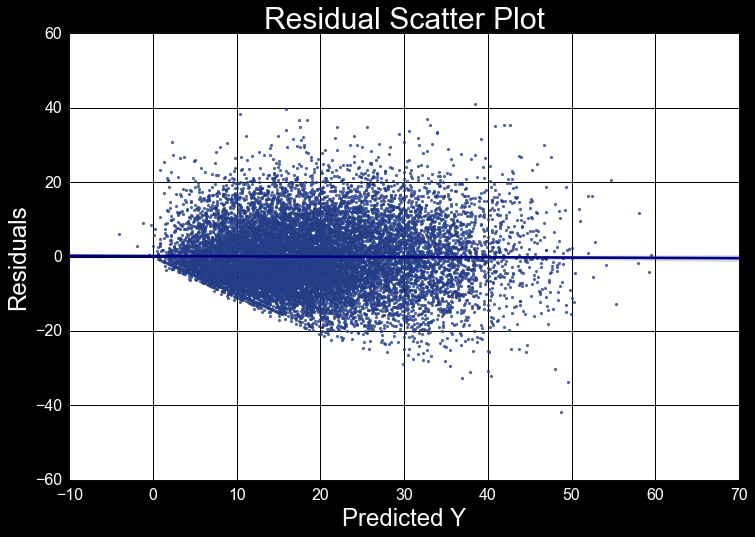

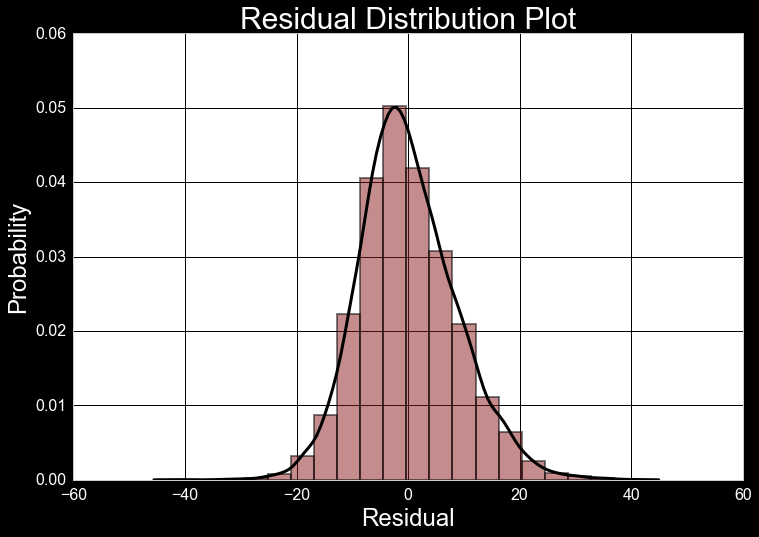

In [107]:
iteration_2(df,y)

## Iteration 3 - Try Polynomial

In [116]:
def iteration_3_sklearn(df, y):
    features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='poly', degree=2,
                   randomstate=False, print_params=False,plot_resid=False)  

In [117]:
def iteration_4_sklearn(df, y):
    features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='poly', degree=3,
                   randomstate=False, print_params=False,plot_resid=False)  

In [118]:
def iteration_5_sklearn(df, y):
    features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='poly', degree=4,
                   randomstate=False, print_params=False,plot_resid=False)  

In [119]:
def iteration_6_sklearn(df, y):
    features = ['DAYS_SINCE_LAST_GAME', 'HOME', 'AVG_FANDUEL_PTS_LAST_3']
    X = df[features]

    print('Linear Regression Model')
    linreg = model(X, y, features, model_type='poly', degree=5,
                   randomstate=False, print_params=False,plot_resid=False)  

In [120]:
iteration_3_sklearn(df,y)

Linear Regression Model
Cross Validated
Mean Squared Error: 85.7105059502
-------------------------
Out of Sample
R^2 Score: 0.477933770951
Mean Squared Error: 85.240372546
Root Mean Squared Error: 9.23257128572
-------------------------
In Sample
R^2 Score: 0.47040037093
Mean Squared Error: 85.8615794576
Root Mean Squared Error: 9.26615235454


In [121]:
iteration_4_sklearn(df,y)

Linear Regression Model
Cross Validated
Mean Squared Error: 85.6680520053
-------------------------
Out of Sample
R^2 Score: 0.471286140864
Mean Squared Error: 86.7406462723
Root Mean Squared Error: 9.31346585715
-------------------------
In Sample
R^2 Score: 0.474162031792
Mean Squared Error: 85.0751386901
Root Mean Squared Error: 9.22361852475


In [122]:
iteration_5_sklearn(df,y)

Linear Regression Model


/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cross Validated
Mean Squared Error: 85.6478310546
-------------------------
Out of Sample
R^2 Score: 0.474567150634
Mean Squared Error: 86.0200156379
Root Mean Squared Error: 9.27469760358
-------------------------
In Sample
R^2 Score: 0.473410055981
Mean Squared Error: 85.2749765201
Root Mean Squared Error: 9.23444511165


In [123]:
iteration_6_sklearn(df,y)

Linear Regression Model


/Users/Masa/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cross Validated
Mean Squared Error: 85.7725664094
-------------------------
Out of Sample
R^2 Score: 0.390122964
Mean Squared Error: 99.7112033062
Root Mean Squared Error: 9.98554972479
-------------------------
In Sample
R^2 Score: 0.472974255504
Mean Squared Error: 85.3885118195
Root Mean Squared Error: 9.24059044756


# Stats Model Approach

In [124]:
def stats_model(df, features, label):
    features_joined = ' + '.join(features)
    formula = label[0] + ' ~ ' + features_joined
    
    model = smf.ols(formula, data=df)
    fit = model.fit()
    return fit

## Iteration 1

In [100]:
features_1 = ['DAYS_SINCE_LAST_GAME', 'HOME',
              'LAST_TEN', 'AVG_MIN_LAST_1', 'AVG_FANDUEL_PTS_LAST_1',
              'AVG_PTS_LAST_1', 'AVG_FGM_LAST_1', 'AVG_FGA_LAST_1', 'AVG_FG3M_LAST_1',
              'AVG_FG3A_LAST_1', 'AVG_FTM_LAST_1', 'AVG_FTA_LAST_1',
              'AVG_OREB_LAST_1', 'AVG_DREB_LAST_1', 'AVG_AST_LAST_1',
              'AVG_STL_LAST_1', 'AVG_BLK_LAST_1', 'AVG_TOV_LAST_1', 'AVG_PF_LAST_1',
              'AVG_MIN_LAST_3', 'AVG_FANDUEL_PTS_LAST_3', 'AVG_PTS_LAST_3',
              'AVG_FGM_LAST_3', 'AVG_FGA_LAST_3', 'AVG_FG3M_LAST_3',
              'AVG_FG3A_LAST_3', 'AVG_FTM_LAST_3', 'AVG_FTA_LAST_3',
              'AVG_OREB_LAST_3', 'AVG_DREB_LAST_3', 'AVG_AST_LAST_3',
              'AVG_STL_LAST_3', 'AVG_BLK_LAST_3', 'AVG_TOV_LAST_3', 'AVG_PF_LAST_3',
              'AVG_MIN_LAST_5', 'AVG_FANDUEL_PTS_LAST_5', 'AVG_PTS_LAST_5',
              'AVG_FGM_LAST_5', 'AVG_FGA_LAST_5', 'AVG_FG3M_LAST_5',
              'AVG_FG3A_LAST_5', 'AVG_FTM_LAST_5', 'AVG_FTA_LAST_5',
              'AVG_OREB_LAST_5', 'AVG_DREB_LAST_5',
              'AVG_AST_LAST_5', 'AVG_STL_LAST_5', 'AVG_BLK_LAST_5', 'AVG_TOV_LAST_5',
              'AVG_PF_LAST_5', 'AVG_MIN_LAST_10', 'AVG_FANDUEL_PTS_LAST_10',
              'AVG_PTS_LAST_10', 'AVG_FGM_LAST_10', 'AVG_FGA_LAST_10',
              'AVG_FG3M_LAST_10', 'AVG_FG3A_LAST_10', 'AVG_FTM_LAST_10',
              'AVG_FTA_LAST_10', 'AVG_OREB_LAST_10', 'AVG_DREB_LAST_10',
              'AVG_AST_LAST_10', 'AVG_STL_LAST_10', 'AVG_BLK_LAST_10',
              'AVG_TOV_LAST_10', 'AVG_PF_LAST_10', 'W_PCT', 'OPP_FG_PCT',
              'OPP_FG3_PCT', 'OPP_FT_PCT', 'OPP_OREB', 'OPP_DREB', 'OPP_AST',
              'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_BLKA', 'OPP_PF', 'OPP_PFD',
              'OPP_PTS', 'POS_C', 'POS_PF', 'POS_PG', 'POS_SF', 'POS_SG',
              'POS_UNKNOWN']

In [101]:
len(features_1)

87

In [69]:
stats_model_1 = stats_model(df,features_1,label)
stats_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FANDUEL_PTS   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     744.2
Date:                Thu, 02 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:42:54   Log-Likelihood:            -1.8312e+05
No. Observations:               51091   AIC:                         3.664e+05
Df Residuals:                   51012   BIC:                         3.671e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept               -3.816e+09   6.13e+09     -0.623      0.533     -1.58e+10  8.19e+09
DAYS_SINCE_LAST_GAME       -0.0716      0.010     -7.133      0.000        -0.091    -0.052
HOME                        0.4304      0.077      5.568      0.000         0.279     0.582
LAST_TEN                    0.2152      0.170      1.269      0.204        -0.117     0.548
AVG_MIN_LAST_1              0.0555      0.012      4.535      0.000         0.031     0.079
AVG_FANDUEL_PTS_LAST_1    1.31e+10    2.1e+10      0.623      0.533     -2.81e+10  5.43e+10
AVG_PTS_LAST_1          -2.775e+09   4.45e+09     -0.623      0.533     -1.15e+10  5.96e+09
AVG_FGM_LAST_1          -2.065e+10   3.32e+10     -0.623      0.533     -8.56e+10  4.43e+10
AVG_FGA_LAST_1             -0.0036      0.030     -0.120      0.904        -0.063     0.055
AVG_FG3M_LAST_1         -1.033e+10   1.66e+10     -0.623      0.533     -4.28e+10  2.22e+10
AVG_FG3A_LAST_1             0.0631      0.052      1.208      0.227        -0.039     0.165
AVG_FTM_LAST_1          -1.033e+10   1.66e+10     -0.623      0.533     -4.28e+10  2.22e+10
AVG_FTA_LAST_1              0.1039      0.058      1.793      0.073        -0.010     0.217
AVG_OREB_LAST_1         -1.572e+10   2.52e+10     -0.623      0.533     -6.52e+10  3.37e+10
AVG_DREB_LAST_1         -1.572e+10   2.52e+10     -0.623      0.533     -6.52e+10  3.37e+10
AVG_AST_LAST_1          -1.965e+10   3.15e+10     -0.623      0.533     -8.15e+10  4.22e+10
AVG_STL_LAST_1           -2.62e+10   4.21e+10     -0.623      0.533     -1.09e+11  5.62e+10
AVG_BLK_LAST_1           -2.62e+10   4.21e+10     -0.623      0.533     -1.09e+11  5.62e+10
AVG_TOV_LAST_1            1.31e+10    2.1e+10      0.623      0.533     -2.81e+10  5.43e+10
AVG_PF_LAST_1               0.0342      0.038      0.889      0.374        -0.041     0.109
AVG_MIN_LAST_3              0.1237      0.030      4.164      0.000         0.065     0.182
AVG_FANDUEL_PTS_LAST_3   1.572e+10   2.52e+10      0.623      0.533     -3.37e+10  6.52e+10
AVG_PTS_LAST_3            1.25e+10   2.01e+10      0.623      0.533     -2.68e+10  5.18e+10
AVG_FGM_LAST_3          -5.643e+10   9.06e+10     -0.623      0.533     -2.34e+11  1.21e+11
AVG_FGA_LAST_3              0.1268      0.075      1.700      0.089        -0.019     0.273
AVG_FG3M_LAST_3         -2.822e+10   4.53e+10     -0.623      0.533     -1.17e+11  6.06e+10
AVG_FG3A_LAST_3            -0.0002      0.131     -0.001      0.999        -0.256     0.256
AVG_FTM_LAST_3          -2.822e+10   4.53e+10     -0.623      0.533     -1.17e+11  6.06e+10
AVG_FTA_LAST_3             -0.1968      0.144     -1.369      0.171        -0.479     0.085
AVG_OREB_LAST_3         -1.886e+10   3.03e+10     -0.623      0.533     -7.82e+10  4.05e+10
AVG_DREB_LAST_3         -1.886e+10   3.03e+10  